# Primer corte del proyecto final de Estadística

### Tema de la BD: 
Consumo cultural en los jóvenes cubanos. Los datos fueron obtenidos mediante la realización de una encuesta.

### Integrantes:
- Ariadna Velázquez Rey  C311
- Lia Stephanie López Rosales  C312
- Raidel Miguel Cabellud Lizaso  C311

## Importación de las librerías necesarias

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
from scipy.stats import norm


## 1. Carga de datos

In [131]:
archivo = './Consumo_Cultural_en_Cuba.xlsx'  # Ruta al archivo proporcionado
df = pd.read_excel(archivo)

## 2. Normalización de "Géneros musicales favoritos"

In [132]:
# Función para separar y normalizar los géneros musicales
def normalizar_generos(df, columna, separador=','):
    # Crear una lista de listas con los géneros separados
    generos_separados = df[columna].dropna().apply(lambda x: [g.strip() for g in x.split(separador)])
    
    # Desplegar la lista y crear un DataFrame
    generos_planos = list(chain(*generos_separados))
    genero_frecuencia = pd.Series(generos_planos).value_counts().reset_index()
    genero_frecuencia.columns = ['Genero', 'Frecuencia']
    
    return genero_frecuencia

In [133]:
# Aplicar la normalización
df_generos_normalizados = normalizar_generos(df, 'Géneros musicales favoritos')
print("Generos musicales normalizados:")
print(df_generos_normalizados['Genero'].value_counts())

Generos musicales normalizados:
Genero
Pop                                       1
Lo-Fi                                     1
alt rock                                  1
post punk                                 1
Romántico                                 1
                                         ..
Country                                   1
indie latino                              1
Baladas románticas                        1
Alternative y R&B                         1
Timba ¿Cómo no va a estar en la lista?    1
Name: count, Length: 65, dtype: int64


## 3. Normalización de categorías similares en columnas

In [134]:
def normalizar_categorias(df, columna, mapeo):
    df[columna] = df[columna].replace(mapeo)
    return df

In [135]:
# Mapeos para normalizar nombres
mapeo_plataformas = {
    'SnapTube ': 'Snaptube',
    'La descargo por Snaptube': 'Snaptube',
    'descargadas desde snaptube': 'Snaptube',
    'Vidmate': 'VidMate'
}

mapeo_universidades = {
    'UH': 'Universidad de La Habana',
    'Universidad de La Habana': 'Universidad de La Habana',
    'Matcom': 'MATCOM',
    'Filosofía ': 'FHS'
}

## 4. Exploración de datos

- ### Inspección inicial

Información general del dataset:

In [136]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Marca temporal                                 172 non-null    datetime64[ns]
 1   Universidad en que estudias                    171 non-null    object        
 2   Facultad en que estudias                       171 non-null    object        
 3   Qué edad tienes?                               172 non-null    int64         
 4   Vertiente cultural que más consumes            172 non-null    object        
 5   Géneros musicales favoritos                    168 non-null    object        
 6   Cantante o grupo favorito                      132 non-null    object        
 7   Plataforma donde más consumes música           171 non-null    object        
 8   Géneros cinematográficos favoritos             169 non-null 

Primeras filas del dataset:

In [137]:
print(df.head())

           Marca temporal Universidad en que estudias  \
0 2024-07-07 09:37:08.497                          UH   
1 2024-07-07 09:43:45.764                          UH   
2 2024-07-07 09:56:11.729                          UH   
3 2024-07-07 10:02:35.432                          UH   
4 2024-07-07 10:08:25.765                         ISA   

                            Facultad en que estudias  Qué edad tienes?  \
0                                             MATCOM                22   
1                                             MATCOM                20   
2                                                FHS                20   
3                                           Biología                20   
4  Facultad de Arte de los Medios de Comunicación...                18   

  Vertiente cultural que más consumes             Géneros musicales favoritos  \
0                              Música                           Rock, Hip-Hop   
1                              Música  Rock, Hip-H

- ### Descripción estadística básica

In [138]:
print(df.describe())

                      Marca temporal  Qué edad tienes?
count                            172        172.000000
mean   2024-07-08 04:46:52.402575872         20.104651
min       2024-07-07 09:37:08.497000         17.000000
25%    2024-07-07 11:09:35.190500096         19.000000
50%    2024-07-07 13:52:34.668499968         20.000000
75%    2024-07-08 06:32:28.616750080         21.000000
max       2024-07-24 11:45:22.526000         26.000000
std                              NaN          1.506548


- ### Verificar valores nulos

In [139]:
print(df.isnull().sum())

Marca temporal                                    0
Universidad en que estudias                       1
Facultad en que estudias                          1
Qué edad tienes?                                  0
Vertiente cultural que más consumes               0
Géneros musicales favoritos                       4
Cantante o grupo favorito                        40
Plataforma donde más consumes música              1
Géneros cinematográficos favoritos                3
Plataforma donde mas consumes cine               10
Película favorita                                46
Gèneros literarios favoritos                      8
Plataforma donde más consumes literatura         14
Escritor favorito                                60
Arte plástica favorita                           27
Plataforma donde más consumes artes plásticas    23
Artista plástico favorito                        84
dtype: int64


- ### Identificar valores atípicos con un boxplot para variables numéricas

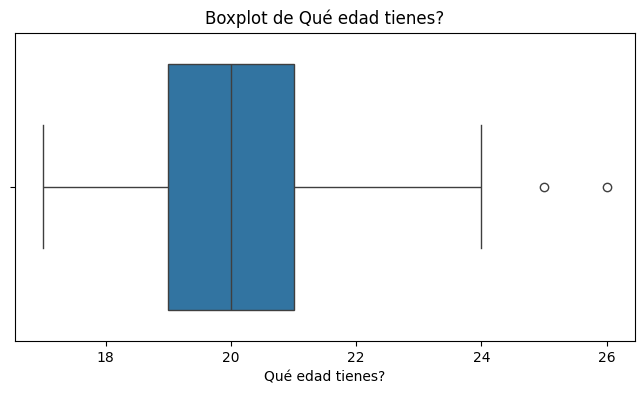

In [140]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

## 5. Medidas de tendencia central (media, mediana, moda)


In [141]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    print(f"{col}:")
    print(f"  Media: {df[col].mean()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode()[0]}\n")

Qué edad tienes?:
  Media: 20.1046511627907
  Mediana: 20.0
  Moda: 20



## 6. Medidas de dispersión (varianza, desviación estándar, rango)


In [142]:
for col in numeric_cols:
    rango = df[col].max() - df[col].min()
    print(f"{col}:")
    print(f"Varianza: {df[col].var()}")
    print(f"Desviación estándar: {df[col].std()}")
    print(f"Rango: {rango}\n")

Qué edad tienes?:
Varianza: 2.2696858425132596
Desviación estándar: 1.5065476569007896
Rango: 9



## 7. Visualización

- ### Histogramas

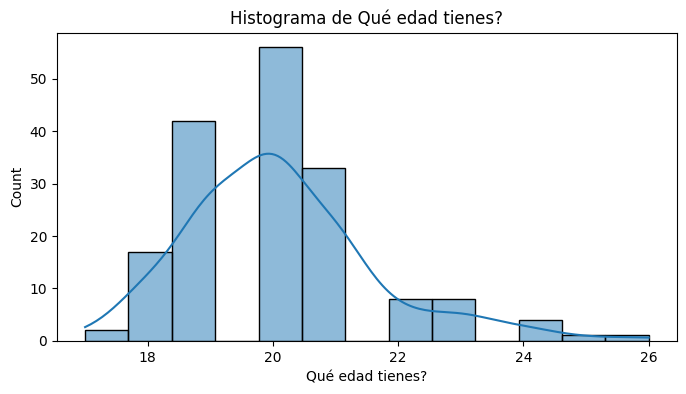

In [143]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

- ### Diagrama de dispersión para cada par de variables numéricas

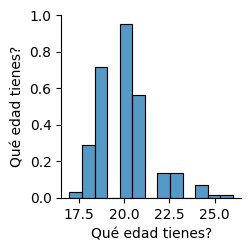

In [144]:
sns.pairplot(df[numeric_cols])
plt.show()

- ### Boxplots para todas las variables numéricas

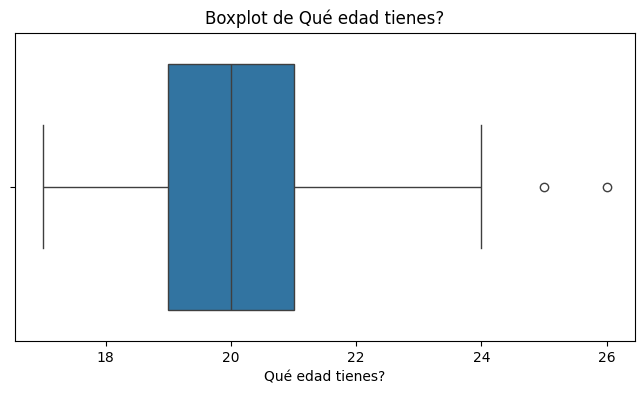

In [145]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

Gráfico d Vertientes Culturales

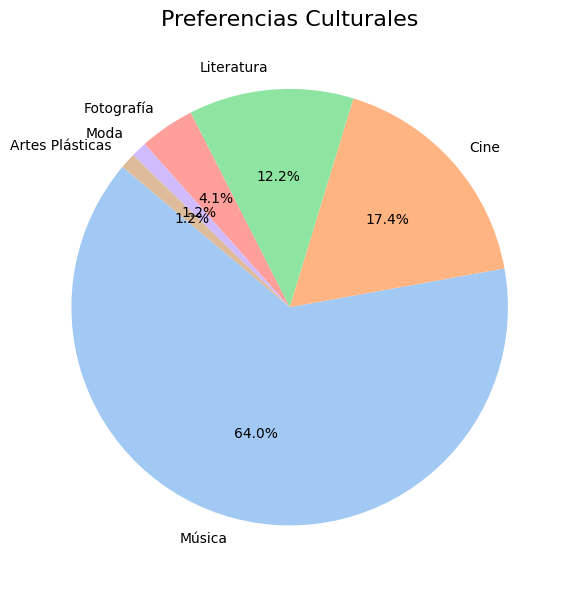

In [146]:
# Visualización para "Vertiente cultural que más consumes"
def plot_cultural_preference(data, cultural_column='Vertiente cultural que más consumes'):
    plt.figure(figsize=(10, 6))
    cultural_counts = data[cultural_column].value_counts()
    colors = sns.color_palette("pastel", len(cultural_counts))
    plt.pie(cultural_counts, labels=cultural_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("Preferencias Culturales", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_cultural_preference(df)

Gráfico de Facultades

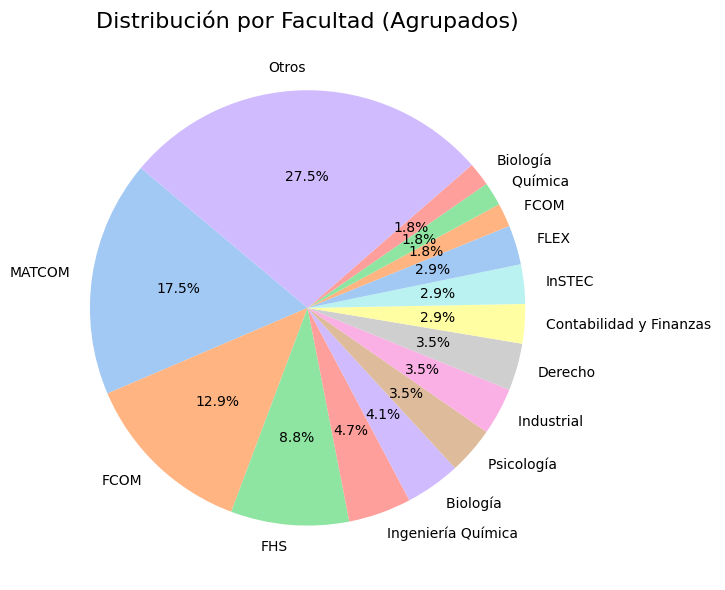

In [147]:
# Función para agrupar valores pequeños en "Otros"
def group_small_categories(series, threshold=0.010):
    total = series.sum()
    series_perc = series / total  # Calcula proporciones
    grouped_series = series.copy()
    grouped_series[series_perc < threshold] = 0  # Valores menores al umbral se agrupan
    grouped_series['Otros'] = series[series_perc < threshold].sum()  # Agrupa en "Otros"
    return grouped_series[grouped_series > 0]  # Filtra los valores mayores a 0

# Visualización circular para "Facultad en que estudias"
def plot_faculty_distribution_pie(data, faculty_column='Facultad en que estudias', threshold=0.015):
    plt.figure(figsize=(10, 6))
    faculty_counts = data[faculty_column].value_counts()
    grouped_faculty_counts = group_small_categories(faculty_counts, threshold=threshold)
    colors = sns.color_palette("pastel", len(grouped_faculty_counts))
    plt.pie(
        grouped_faculty_counts, 
        labels=grouped_faculty_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    plt.title("Distribución por Facultad (Agrupados)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_faculty_distribution_pie(df)

Gráfico de Universidades

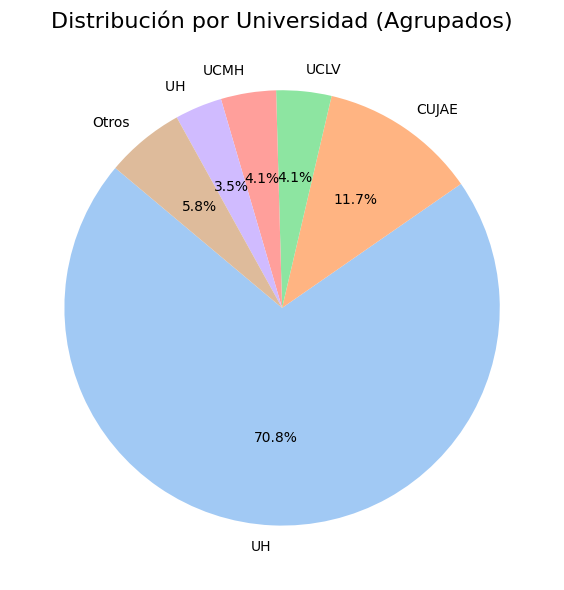

In [148]:
# Gráfico circular para "Universidad en que estudias" con agrupación
def plot_university_distribution_pie(data, university_column='Universidad en que estudias', threshold=0.025):
    def group_small_categories(series, threshold=0.025):
        total = series.sum()
        series_perc = series / total
        grouped_series = series.copy()
        grouped_series[series_perc < threshold] = 0
        grouped_series['Otros'] = series[series_perc < threshold].sum()
        return grouped_series[grouped_series > 0]

    plt.figure(figsize=(10, 6))
    university_counts = data[university_column].value_counts()
    grouped_university_counts = group_small_categories(university_counts, threshold=threshold)
    colors = sns.color_palette("pastel", len(grouped_university_counts))
    plt.pie(
        grouped_university_counts, 
        labels=grouped_university_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    plt.title("Distribución por Universidad (Agrupados)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_university_distribution_pie(df)

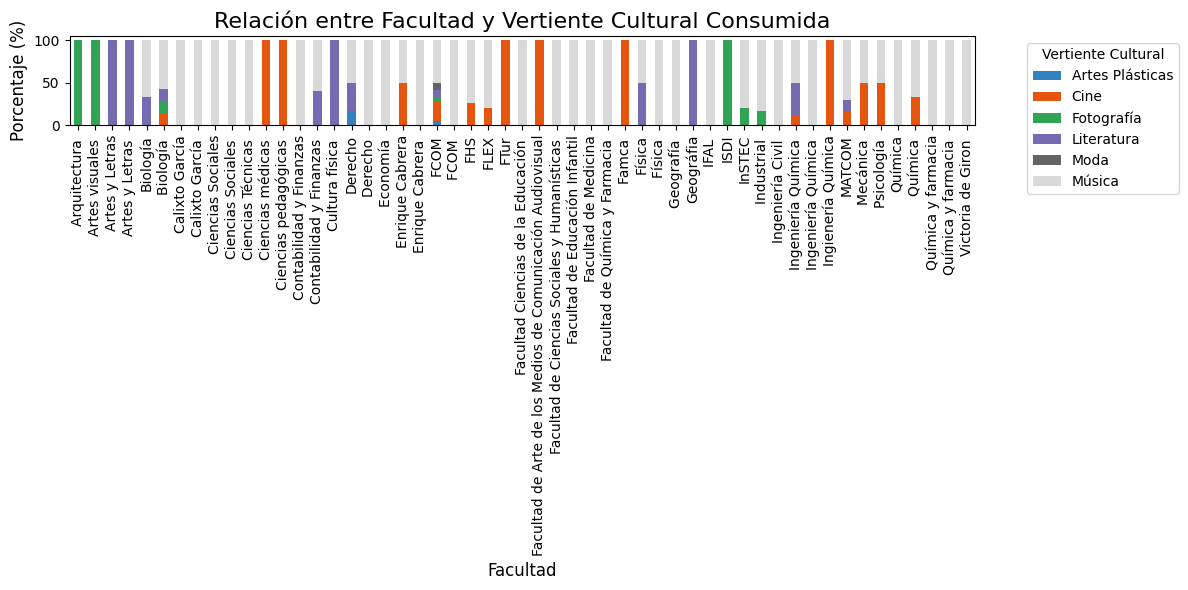

In [149]:
def plot_stacked_bar_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column], normalize='index') * 100  # Normalizar por fila
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
    plt.title("Relación entre Facultad y Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Facultad", fontsize=12)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.legend(title="Vertiente Cultural", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
def plot_heatmap_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column])
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title("Mapa de Calor: Facultad vs Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def plot_mosaic_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Preparar datos para el mosaico
    mosaic_data = data.groupby([faculty_column, culture_column]).size()
    mosaic_data = mosaic_data / mosaic_data.sum()  # Normalizar
    mosaic_data = mosaic_data.unstack()  # Convertir a tabla
    plt.figure(figsize=(12, 6))
    mosaic(mosaic_data.stack(), title="Mosaico: Facultad vs Vertiente Cultural")
    plt.tight_layout()
    plt.show()
    
# Gráfico de barras apiladas
plot_stacked_bar_faculty_culture(df)


Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 228.3470
Grados de libertad: 260
Valor p: 0.9221
No se encontró una relación significativa entre la facultad y la vertiente cultural.


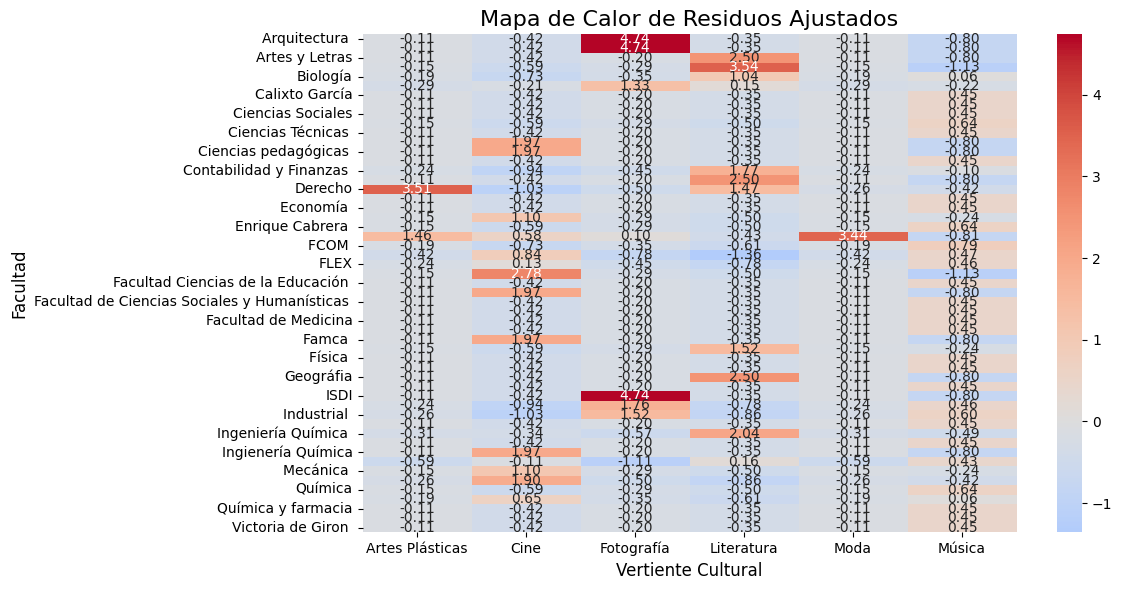


Combinaciones significativas:
Facultad: Arquitectura , Vertiente Cultural: Fotografía -> Residuo ajustado: 4.74, p-value: 0.0000
Facultad: Artes visuales , Vertiente Cultural: Fotografía -> Residuo ajustado: 4.74, p-value: 0.0000
Facultad: Artes y Letras, Vertiente Cultural: Literatura -> Residuo ajustado: 2.50, p-value: 0.0123
Facultad: Artes y Letras , Vertiente Cultural: Literatura -> Residuo ajustado: 3.54, p-value: 0.0004
Facultad: Ciencias médicas , Vertiente Cultural: Cine -> Residuo ajustado: 1.97, p-value: 0.0490
Facultad: Ciencias pedagógicas , Vertiente Cultural: Cine -> Residuo ajustado: 1.97, p-value: 0.0490
Facultad: Cultura física , Vertiente Cultural: Literatura -> Residuo ajustado: 2.50, p-value: 0.0123
Facultad: Derecho, Vertiente Cultural: Artes Plásticas -> Residuo ajustado: 3.51, p-value: 0.0004
Facultad: FCOM, Vertiente Cultural: Moda -> Residuo ajustado: 3.44, p-value: 0.0006
Facultad: FTur, Vertiente Cultural: Cine -> Residuo ajustado: 2.78, p-value: 0.0054
Fac

In [150]:
def chi_square_test(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[faculty_column], data[culture_column])
    
    # Prueba de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("Resultados de la Prueba de Chi-Cuadrado:")
    print(f"Chi-cuadrado: {chi2:.4f}")
    print(f"Grados de libertad: {dof}")
    print(f"Valor p: {p:.4f}")
    
    # Verificar significancia
    if p < 0.05:
        print("Existe una relación significativa entre la facultad y la vertiente cultural.")
    else:
        print("No se encontró una relación significativa entre la facultad y la vertiente cultural.")
    
    return contingency_table, expected

def plot_residuals_heatmap(contingency_table, expected):
    residuals = (contingency_table - expected) / np.sqrt(expected)  # Residuos ajustados
    plt.figure(figsize=(12, 6))
    sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
    plt.title("Mapa de Calor de Residuos Ajustados", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def post_hoc_analysis(contingency_table, expected, alpha=0.05):
    residuals = (contingency_table - expected) / np.sqrt(expected)
    p_values = 2 * (1 - norm.cdf(np.abs(residuals)))  # Valor p para cada celda
    significant = p_values < alpha  # Identificar celdas significativas
    
    # Mostrar combinaciones significativas
    significant_pairs = np.where(significant)
    print("\nCombinaciones significativas:")
    for i, j in zip(significant_pairs[0], significant_pairs[1]):
        print(f"Facultad: {contingency_table.index[i]}, Vertiente Cultural: {contingency_table.columns[j]} -> Residuo ajustado: {residuals.iloc[i, j]:.2f}, p-value: {p_values[i, j]:.4f}")
    
    return residuals, p_values

# Paso 1: Realizar la prueba de chi-cuadrado
contingency_table, expected = chi_square_test(df)

# Paso 2: Visualizar los residuos ajustados
plot_residuals_heatmap(contingency_table, expected)

# Paso 3: Análisis post hoc para identificar combinaciones significativas
residuals, p_values = post_hoc_analysis(contingency_table, expected)


Columna Artista plástico favorito no encontrada. Saltando Artes Plásticas.

Top 15 para Música:
BTS                  6
Billie Eilish        5
Metallica            4
Imagine Dragons      4
Ariana Grande        3
Kanye West           3
Molchat Doma         2
Silvio Rodríguez     2
Adele                2
Taylor Swift         2
Twenty One Pilots    2
Ed Sheeran           2
Ricardo Arjona       2
Rosalía              2
The Beatles          2
Name: count, dtype: int64

Top 15 para Cine:
Interestelar                            2
Coraline                                2
El Secreto de sus ojos                  1
Rosemarys Baby                          1
Across the universe                     1
El niño con el pijama de rayas          1
Captain Fantastic                       1
Inglorious Basterds                     1
Girl Interrupted                        1
Inferno                                 1
Avatar                                  1
What if                                 1
La trilogí

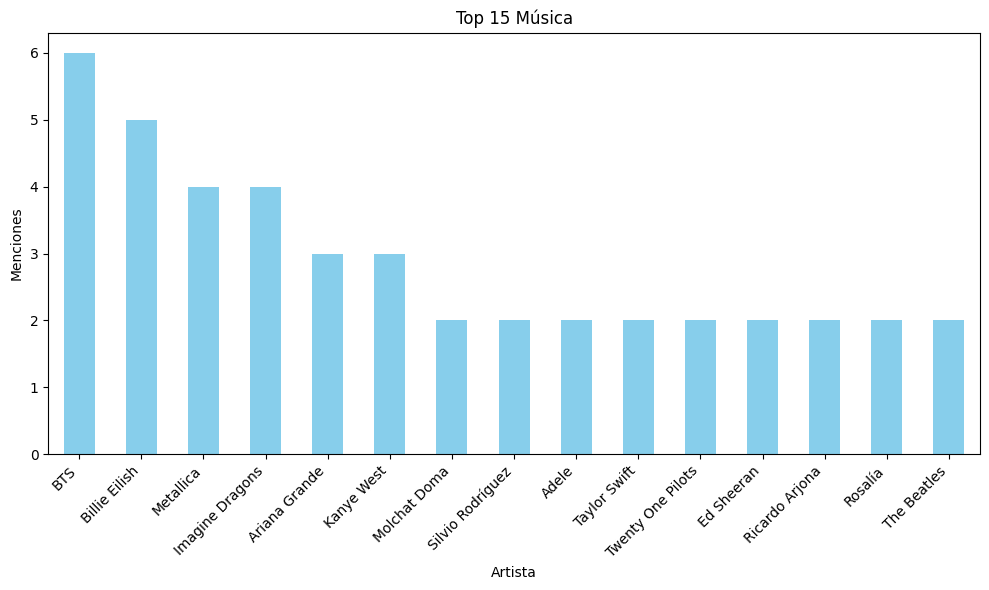

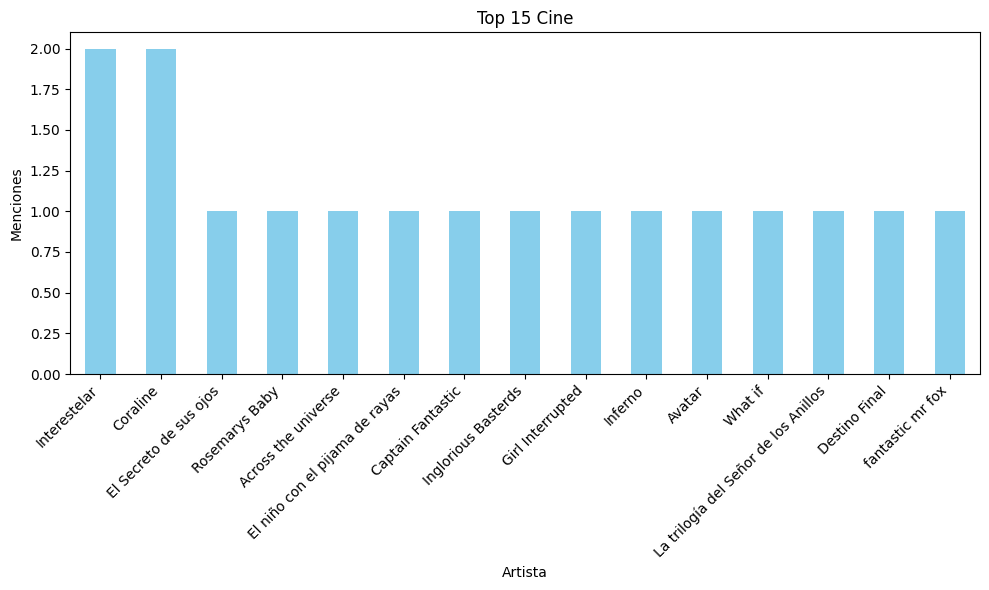

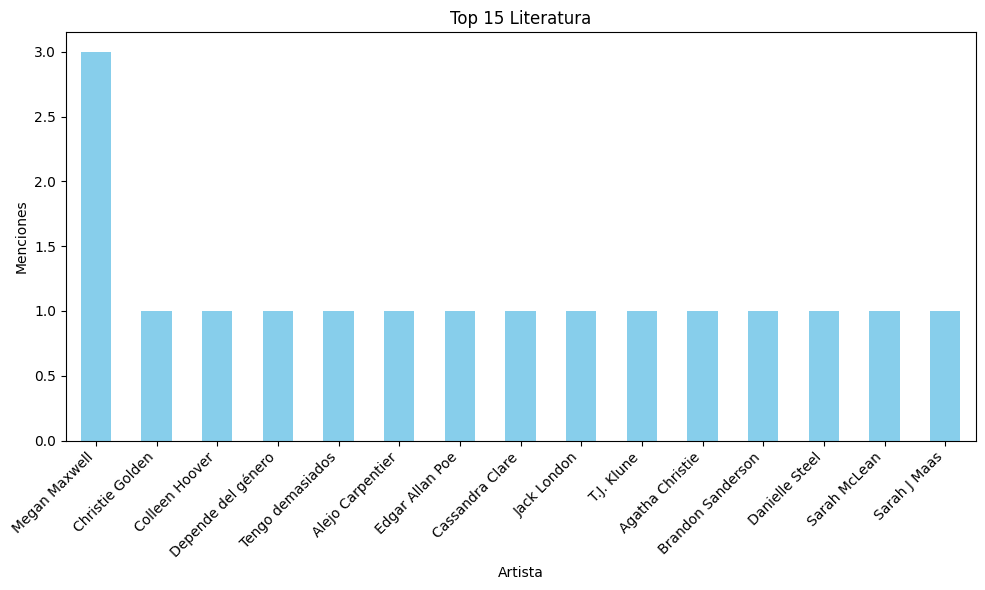

In [151]:


def analyze_favorites(data, culture_column='Vertiente cultural que más consumes', mapping=None):
    """
    Analiza los artistas favoritos por cada vertiente cultural.
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas de datos.
        culture_column (str): Nombre de la columna que contiene la vertiente cultural.
        mapping (dict): Diccionario que asocia vertientes culturales con columnas de artistas favoritos.
    
    Returns:
        dict: Diccionario con los 20 artistas más mencionados por cada vertiente cultural.
    """
    if mapping is None:
        mapping = {
            'Música': 'Cantante o grupo favorito',
            'Cine': 'Película favorita',
            'Literatura': 'Escritor favorito',
            'Artes Plásticas': 'Artista plástico favorito'
        }
    
    # Diccionario para almacenar resultados
    top_artists = {}

    # Iterar por cada vertiente cultural y su columna asociada
    for culture, artist_column in mapping.items():
        if artist_column not in data.columns:
            print(f"Columna {artist_column} no encontrada. Saltando {culture}.")
            continue

        # Filtrar filas de la vertiente cultural actual
        filtered_data = data[data[culture_column] == culture]

        # Crear una lista de todos los artistas mencionados
        artists_list = []
        for response in filtered_data[artist_column].dropna():
            # Dividir respuestas múltiples usando únicamente el delimitador ","
            artists = response.split(',')
            # Limpiar espacios y agregar a la lista
            artists_list.extend([artist.strip() for artist in artists])

        # Contar la frecuencia de cada artista
        artist_counts = pd.Series(artists_list).value_counts()

        # Seleccionar los 20 artistas más mencionados
        top_artists[culture] = artist_counts.head(15)

    return top_artists


mapping = {
    'Música': 'Cantante o grupo favorito',
    'Cine': 'Película favorita',
    'Literatura': 'Escritor favorito',
    'Artes Plásticas': 'Artista plástico favorito'
}

# Análisis
resultados = analyze_favorites(df, culture_column='Vertiente cultural que más consumes', mapping=mapping)

# Mostrar resultados
for culture, artists in resultados.items():
    print(f"\nTop 15 para {culture}:")
    print(artists)

for culture, artists in resultados.items():
    plt.figure(figsize=(10, 6))
    artists.plot(kind='bar', color='skyblue')
    plt.title(f"Top 15 {culture}")
    plt.xlabel("Artista")
    plt.ylabel("Menciones")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Columna Artista plástico favorito no encontrada. Saltando...

Top 15 para Cantante o grupo favorito:
BTS                  8
Imagine Dragons      6
Billie Eilish        6
Ariana Grande        5
Melendi              4
Taylor Swift         4
Metallica            4
Morat                3
Måneskin             3
Ricardo Arjona       3
Kanye West           3
Adele                2
Twenty One Pilots    2
Coldplay             2
Mitski               2
Name: count, dtype: int64

Top 15 para Película favorita:
Interestelar          6
Forrest Gump          4
Inception             3
Piratas del Caribe    3
Fight Club            3
Harry Potter          3
Mamma Mia             3
Avatar                3
Titanic               2
Harry potter          2
Coraline              2
The Hunger Games      2
Lucy                  2
Destino Final         1
About Time            1
Name: count, dtype: int64

Top 15 para Escritor favorito:
Megan Maxwell             4
Oscar Wilde               3
Eduardo Galeano       

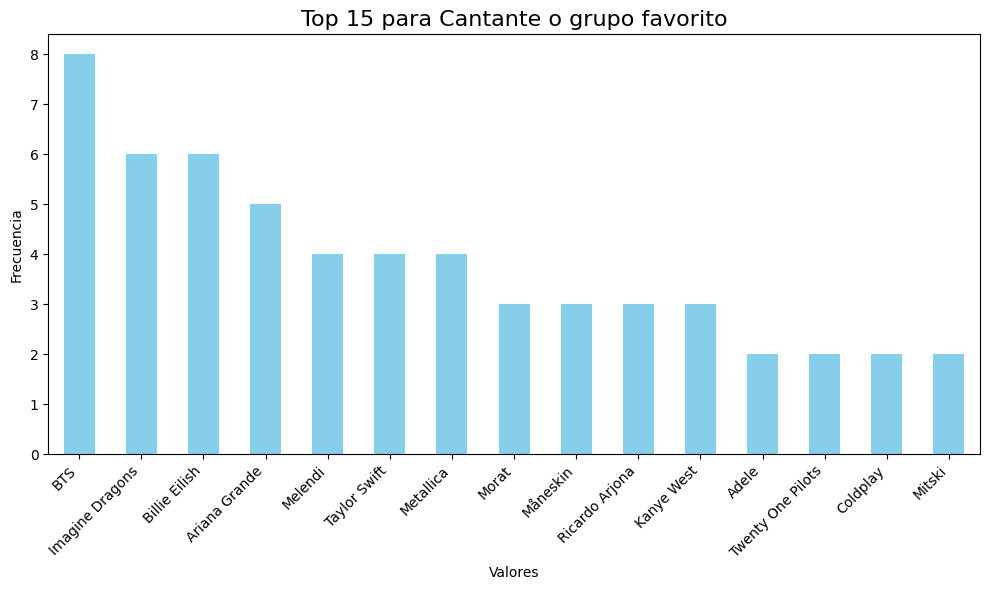

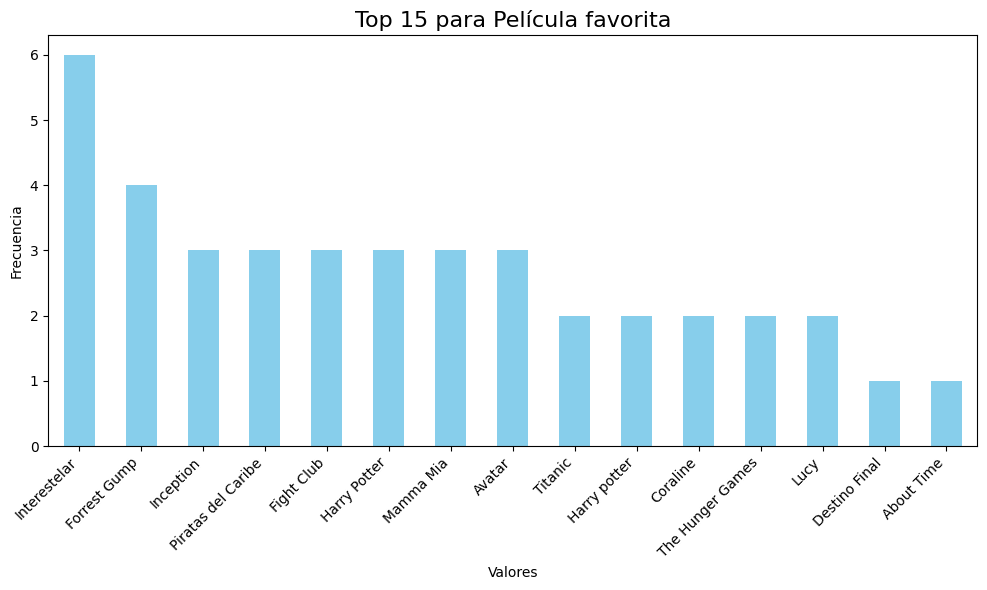

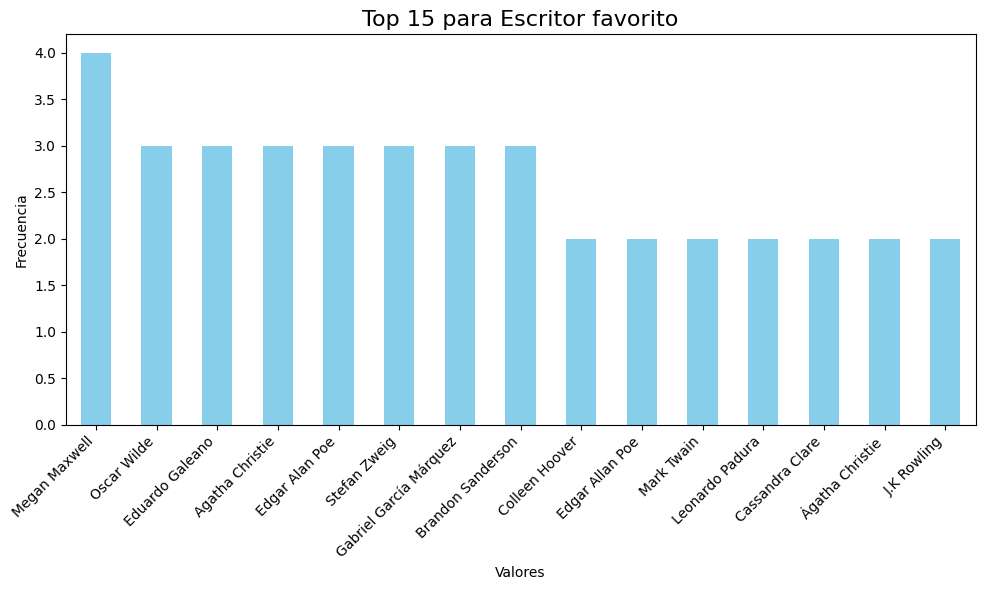

In [163]:
def analyze_top_values(data, columns):
    """
    Analiza los valores más repetidos para cada columna en una lista dada, considerando respuestas múltiples separadas por ",".
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas a analizar.
        columns (list): Lista de nombres de columnas a analizar.
    
    Returns:
        dict: Diccionario con los 20 valores más repetidos para cada columna.
    """
    # Diccionario para almacenar los resultados
    top_values = {}

    for column in columns:
        if column not in data.columns:
            print(f"Columna {column} no encontrada. Saltando...")
            continue

        # Crear una lista para almacenar los valores
        value_list = []

        for response in data[column].dropna():
            # Dividir respuestas múltiples usando únicamente el delimitador ","
            values = response.split(',')
            # Limpiar espacios y agregar a la lista
            value_list.extend([value.strip() for value in values])

        # Contar los valores y obtener los 20 más repetidos
        value_counts = pd.Series(value_list).value_counts()
        top_values[column] = value_counts.head(15)

    return top_values



columns_to_analyze = [
    'Cantante o grupo favorito',
    'Película favorita',
    'Escritor favorito',
    'Artista plástico favorito'
]

# Análisis
resultados_sin_asociacion = analyze_top_values(df, columns_to_analyze)

# Mostrar resultados
for column, values in resultados_sin_asociacion.items():
    print(f"\nTop 15 para {column}:")
    print(values)
    
for column, values in resultados_sin_asociacion.items():
    plt.figure(figsize=(10, 6))
    values.plot(kind='bar', color='skyblue')
    plt.title(f"Top 15 para {column}", fontsize=16)
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 8. Estimadores

- ### Estimación Puntual (Máxima Verosimilitud)

In [152]:
for col in numeric_cols:
    media_mle = df[col].mean()
    desv_std_mle = df[col].std()
    print(f"Columna: {col}")
    print(f"Media (MLE): {media_mle}")
    print(f"Desviación estándar (MLE): {desv_std_mle}")

Columna: Qué edad tienes?
Media (MLE): 20.1046511627907
Desviación estándar (MLE): 1.5065476569007896


- ### Intervalos de Confianza

In [153]:
from scipy.stats import norm

alpha = 0.05  # Nivel de confianza
for col in numeric_cols:
    media = df[col].mean()
    std_err = df[col].std() / (len(df[col]) ** 0.5)  # Error estándar
    ci = norm.interval(1 - alpha, loc=media, scale=std_err)
    print(f"Columna: {col}")
    print(f"Intervalo de confianza al 95%: {ci}")
    
# Crear una columna binaria: menciona 'Rock' o no
rock_present = df['Géneros musicales favoritos'].dropna().apply(lambda x: 1 if 'Rock' in x else 0)

# Calcular proporción y su intervalo de confianza
p_hat = rock_present.mean()  # proporción
n = len(rock_present)
se = np.sqrt((p_hat * (1 - p_hat)) / n)  # error estándar
z = 1.96  # z para 95% de confianza

ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print("\nIntervalo de Confianza para proporción de 'Rock':")
print(f"Proporción: {p_hat:.4f}, Intervalo: [{ci_lower:.4f}, {ci_upper:.4f}]")

Columna: Qué edad tienes?
Intervalo de confianza al 95%: (19.87950386346218, 20.329798462119218)

Intervalo de Confianza para proporción de 'Rock':
Proporción: 0.4702, Intervalo: [0.3948, 0.5457]


## 9. Pruebas de hipótesis

- ### Hipótesis 1: Comprobar si la media de una variable difiere significativamente de un valor hipotético

In [154]:
columna = numeric_cols[0]  # Seleccionar una variable numérica
hipotetico = df[columna].mean() * 1.1  # Ejemplo: media esperada es 10% mayor que la observada
stat, p_value = stats.ttest_1samp(df[columna].dropna(), hipotetico)
print(f"\nHipótesis 1: ¿La media de \"{columna}\" es igual a {hipotetico}?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula (media diferente).")
else:
    print("No podemos rechazar la hipótesis nula (media igual).")


Hipótesis 1: ¿La media de "Qué edad tienes?" es igual a 22.11511627906977?
Estadístico de prueba: -17.501605534834873
p-valor: 5.804368873451156e-40
Rechazamos la hipótesis nula (media diferente).


- ### Hipótesis 2: Comparar las medias de dos grupos

In [155]:
grupo_1 = df[columna].sample(frac=0.5, random_state=1)
grupo_2 = df[columna].sample(frac=0.5, random_state=2)
stat, p_value = stats.ttest_ind(grupo_1, grupo_2)
print(f"\nHipótesis 2: ¿Las medias de dos grupos en \"{columna}\" son iguales?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.1:
    print("Rechazamos la hipótesis nula (medias diferentes).")
else:
    print("No podemos rechazar la hipótesis nula (medias iguales).")


Hipótesis 2: ¿Las medias de dos grupos en "Qué edad tienes?" son iguales?
Estadístico de prueba: -0.19240293792475044
p-valor: 0.8476562382039929
No podemos rechazar la hipótesis nula (medias iguales).


- ### Hipótesis 3: Comprobar si la distribución de una variable es normal

In [156]:
stat, p_value = stats.shapiro(df[columna].dropna())
print(f"\nHipótesis 3: ¿La variable \"{columna}\" sigue una distribución normal?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula (no es normal).")
else:
    print("No podemos rechazar la hipótesis nula (es normal).")


Hipótesis 3: ¿La variable "Qué edad tienes?" sigue una distribución normal?
Estadístico de prueba: 0.9107014401536149
p-valor: 9.909095839965357e-09
Rechazamos la hipótesis nula (no es normal).


### Hipótesis 4: Proporción de Spotify > 50%

In [157]:
spotify_present = df['Plataforma donde más consumes música'].dropna().apply(lambda x: 1 if 'Spotify' in x else 0)
spotify_proporcion = spotify_present.mean()

# Realizar prueba z
z_score = (spotify_proporcion - 0.5) / np.sqrt((0.5 * 0.5) / len(spotify_present))
p_value = 1 - stats.norm.cdf(z_score)

print("\nPrueba de Hipótesis: Proporción de Spotify > 50%")
print(f"Z-Score: {z_score:.4f}, P-Valor: {p_value:.4f}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. La proporcion de usuarios de Spotify es significativamente mayor al 50%.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.")


Prueba de Hipótesis: Proporción de Spotify > 50%
Z-Score: -10.1708, P-Valor: 1.0000
No podemos rechazar la hipótesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.


### Hipótesis 5: Spotify vs. Telegram

In [158]:
telegram_present = df['Plataforma donde más consumes música'].dropna().apply(lambda x: 1 if 'Telegram' in x else 0)

# Proporciones y tamaños
p1, p2 = spotify_present.mean(), telegram_present.mean()
n1, n2 = len(spotify_present), len(telegram_present)

# Estadístico z para diferencia de proporciones
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
se_combined = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
z_diff = (p1 - p2) / se_combined
p_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print("\nPrueba de Hipótesis: Spotify vs Telegram")
print(f"Z-Score: {z_diff:.4f}, P-Valor: {p_diff:.4f}")
if p_diff < 0.05:
    print("Conclusión: Recazamos la hipótesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.")
else:
    print("Conclusión: No se rechaza la hipótesis nula. No hay evidencia suficiente de una evidencia significativa entre las proporciones de usuarios de Sotify y Telegram.")



Prueba de Hipótesis: Spotify vs Telegram
Z-Score: -7.5646, P-Valor: 0.0000
Conclusión: Recazamos la hipótesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.


## 9.1 Tablas de Contingencia y Tests

In [159]:
# Crear tabla de contingencia entre 'Vertiente cultural' y 'Plataforma de música'
tabla_contingencia = pd.crosstab(df['Vertiente cultural que más consumes'],
                                df['Plataforma donde más consumes música'])

### Test de Independencia

In [160]:
chi2, p_chi2, dof, expected = stats.chi2_contingency(tabla_contingencia)

print("\nTest de Independencia:")
print(f"Chi-cuadrado: {chi2:.4f}, P-Valor: {p_chi2:.4f}")
print("Tabla de Contingencia:")
print(tabla_contingencia)


Test de Independencia:
Chi-cuadrado: 43.1107, P-Valor: 0.9509
Tabla de Contingencia:
Plataforma donde más consumes música  Apple Music  Deezer  \
Vertiente cultural que más consumes                         
Artes Plásticas                                 1       0   
Cine                                            0       2   
Fotografía                                      1       1   
Literatura                                      0       3   
Moda                                            0       0   
Música                                          2       9   

Plataforma donde más consumes música  La descargo por Snaptube  \
Vertiente cultural que más consumes                              
Artes Plásticas                                              0   
Cine                                                         0   
Fotografía                                                   0   
Literatura                                                   0   
Moda                         

### Test de Homogeneidad

In [161]:
# Comparar la distribución de 'Plataforma donde más consumes música' entre dos vertientes culturales
vertientes_filtradas = df['Vertiente cultural que más consumes'].dropna().unique()[:2]
sub_df = df[df['Vertiente cultural que más consumes'].isin(vertientes_filtradas)]

homogeneidad_tabla = pd.crosstab(sub_df['Vertiente cultural que más consumes'],
                                sub_df['Plataforma donde más consumes música'])

chi2_hom, p_hom, dof_hom, expected_hom = stats.chi2_contingency(homogeneidad_tabla)

print("\nTest de Homogeneidad:")
print(f"Chi-cuadrado: {chi2_hom:.4f}, P-Valor: {p_hom:.4f}")


Test de Homogeneidad:
Chi-cuadrado: 3.6518, P-Valor: 0.9889
